This notebook demonstrates the QUTIP simulation and the time-evolution of two qubits for Rigetti & Devoret (2016) Cross-Resonant (CR) Hamiltonian. Written for ELE456 Quantum Optics Final Project, by Alkin Kaz, Alan Chung, Nishaad Khedkar. 

First, import the relevant packages.

In [193]:
%matplotlib inline
from qutip import *
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Physical parameters of the system are as follows:

In [194]:
w1 = 4.822e9 * 2 * np.pi # transition freq. of qubit 1 (IBM Casablanca Qubit 0)
w2 = 4.775e9 * 2 * np.pi # transition freq. of qubit 2 (IBM Casablanca Qubit 1)
Om1 = 1 * 2 * np.pi # amplitude of the microwave signal applied to qubit 1
Om2 = 1e-4 * 2 * np.pi # amplitude of the microwave signal applied to qubit 2
w1_rf = 4.775e9 * 2 * np.pi # frequency of the microwave signal applied to qubit 1
w2_rf = 4.775e9 * 2 * np.pi # frequency of the microwave signal applied to qubit 2
w_xx = 3e8 * 2 * np.pi # coupling energy
ph1 = np.pi/6 # phase of the microwave signal applied to qubit 1
ph2 = 0 # phase of the microwave signal applied to qubit 2

Derived useful quantities:

In [195]:
d1 = w1 - w1_rf # qubit-field detuning for qubit 1
d2 = w2 - w2_rf # qubit-field detuning for qubit 2
D = np.abs(w1-w2) # interqubit detuning
eta1 = np.sqrt(d1**2 + Om1**2) # strength of the static local field for qubit 1
eta2 = np.sqrt(d2**2 + Om2**2) # strength of the static local field for qubit 2
ksi1 = np.arctan(d1 / Om1) # tilt angle for static local field for qubit 1
ksi2 = np.arctan(d2 / Om2) # tilt angle for static local field for qubit 2

We are investigating a strict two-level two-qubit system, following are useful operators:

In [196]:
s1x = tensor(sigmax(), identity(2))
s1y = tensor(sigmay(), identity(2))
s1z = tensor(sigmaz(), identity(2))
s2x = tensor(identity(2), sigmax())
s2y = tensor(identity(2), sigmay())
s2z = tensor(identity(2), sigmaz())

The following are the Hamiltonian terms in Eq. (1) of the paper ($\hbar = 1$), time-dependency being factored out for later definition (qutip mandates this).

In [197]:
H1_qubit = 0.5*w1*s1z
H1_field = Om1*s1x
H2_qubit = 0.5*w2*s2z
H2_field = Om2*s2x
H_couple = 0.5*w_xx*s1x*s2x

Time-dependent coefficients:

In [198]:
def H1_field_coeff(t, args):
    freq = args['w1_rf']
    ph = args['ph1']
    return np.cos(freq*t + ph)

def H2_field_coeff(t, args):
    freq = args['w2_rf']
    ph = args['ph2']
    return np.cos(freq*t + ph)

Then, the complete Hamiltonian is:

In [199]:
H = [H1_qubit, H2_qubit, H_couple, [H1_field, H1_field_coeff], [H2_field, H2_field_coeff]]

@TODO some other Hamiltonians. Eq. (13)

In [200]:
H = (0.25 * w_xx/(1 + (D/Om1)**2))*(np.cos(ph1)*s1x*s2x + np.sin(ph1)*s1x*s2y + (D/Om1)*np.cos(ph1)*s1z*s2x + (D/Om1)*np.sin(ph1)*s1z*s2y)

Eq. (11)

In [201]:
w_xx_eff = 0.5*w_xx*np.cos(ksi1)
H = 0.5*w_xx_eff*(np.cos(ph1)*s1x*s2x+np.sin(ph1)*s1x*s2y)

The initial state can be varied according to our desire.

In [202]:
psi0 = tensor(basis(2,1), basis(2,0))

Then, solve the Schrodinger Equation.

In [203]:
times = np.linspace(0, 1e-8, 100)
args = {'w1_rf':w1_rf, 'w2_rf':w2_rf, 'ph1':ph1, 'ph2':ph2}
result = sesolve(H, psi0, times, [s1x, s1y, s1z, s2x, s2y, s2z], args=args)

Plot the resulting states.

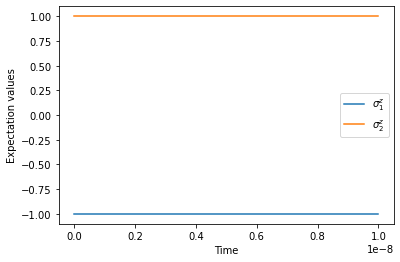

In [204]:
fig, ax = plt.subplots()
ax.plot(result.times, result.expect[2])
ax.plot(result.times, result.expect[5])
ax.set_xlabel("Time")
ax.set_ylabel("Expectation values")
ax.legend((r'$\sigma_1^z$', r'$\sigma_2^z$'))
plt.show()
plt.close(fig)

Bloch Diagrams as well.

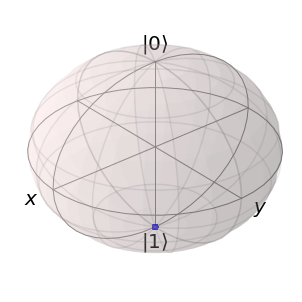

<Figure size 360x360 with 0 Axes>

In [205]:
num_times1 = 500
fig1 = plt.figure()
axes1 = Axes3D(fig1, azim=-40,elev=30)
sphere1 = Bloch(axes=axes1)
sphere1.add_points([result.expect[0][:num_times1], result.expect[1][:num_times1], result.expect[2][:num_times1]])
sphere1.make_sphere()
plt.show()
plt.close()

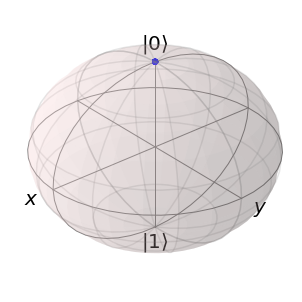

<Figure size 360x360 with 0 Axes>

In [206]:
num_times2 = 50
fig2 = plt.figure()
axes2 = Axes3D(fig2, azim=-40,elev=30)
sphere2 = Bloch(axes=axes2)
sphere2.add_points([result.expect[3][:num_times2], result.expect[4][:num_times2], result.expect[5][:num_times2]])
sphere2.make_sphere()
plt.show()
plt.close()